In [45]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
from sklearn.preprocessing import StandardScaler

# Q.1
Function Approximation for Dataset 1 using MLFFNN with one hidden layer having 8 nodes

In [68]:
import pandas as pd
data = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset1\train100.csv")
data.columns

test = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset1\test.csv")
x_test = test[["x1", "x2"]]
y_test = test["y"].to_numpy(dtype=np.float32).reshape(-1, 1)

In [64]:
# ---- Prepare data ----
X = data[["x1", "x2"]].to_numpy(dtype=np.float32)
y = data["y"].to_numpy(dtype=np.float32).reshape(-1, 1)


# ---- Build model (no explicit initializers) ----
BETA = 1.0
sgd = SGD(learning_rate=0.07, momentum=0.9, clipnorm=1.0)

reg_model = Sequential([
    Dense(8, input_shape=(X.shape[1],), activation="tanh"),
    Dense(1, activation='linear')
])

reg_model.compile(optimizer=sgd, loss='mse')

# ---- Train ----
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, restore_best_weights=True)
nan_killer = TerminateOnNaN()

history = reg_model.fit(
    X, y,
    batch_size=1,   # pattern mode
    epochs=100,
    shuffle=True,
    # callbacks=[early_stop, nan_killer],
    verbose=1
)


Epoch 1/100


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 220.0817
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149.0488
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 140.7848
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.7518
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.6783
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121.6774
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.2936
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.8925
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.7730
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.2826
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86.8206
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.1406
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105.8079
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.7686 
Epoch 15/100
100/100 ━━━━━━━━━━━━

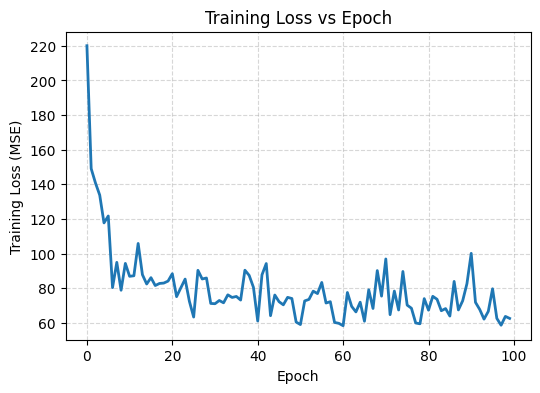

In [65]:
# ---- Plots & metrics using the model you already trained above ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 1) Training loss vs epoch
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss vs Epoch")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



RMSE (original scale): 65.262291
R^2  (original scale): 0.742652


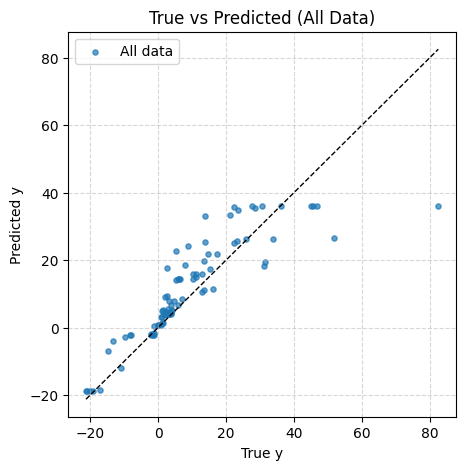

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 2) Predictions (denormalize back to original scale)
y_pred = reg_model.predict(X, verbose=0) 

# 3) Metrics on the whole dataset
rmse = mean_squared_error(y, y_pred)
r2   = r2_score(y, y_pred)
print(f"RMSE (original scale): {rmse:.6f}")
print(f"R^2  (original scale): {r2:.6f}")

# 4) Scatter: True vs Predicted (whole dataset)
lo = np.min(np.concatenate([y, y_pred]))
hi = np.max(np.concatenate([y, y_pred]))

plt.figure(figsize=(5,5))
plt.scatter(y, y_pred, s=14, label='Training data', alpha=0.7)
plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted (All Data)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


RMSE (original scale): 50.220791
R^2  (original scale): -0.916444


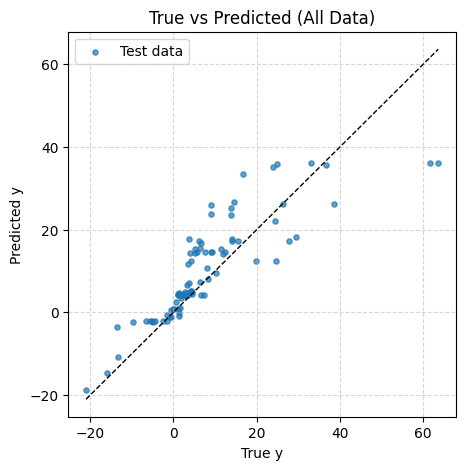

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 2) Predictions (denormalize back to original scale)
y_pred_test = reg_model.predict(x_test, verbose=0) 

# 3) Metrics on the whole dataset
rmse = mean_squared_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred)
print(f"RMSE (original scale): {rmse:.6f}")
print(f"R^2  (original scale): {r2:.6f}")

# 4) Scatter: True vs Predicted (whole dataset)
lo = np.min(np.concatenate([y_test, y_pred_test]))
hi = np.max(np.concatenate([y_test, y_pred_test]))

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, s=14, label='Test data', alpha=0.7)
plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted (All Data)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Issues faces - 
1. nan without glorot initialiser and scaling
2. 0.7 learning rate is too high